<a href="https://colab.research.google.com/github/emad550/AI_DS/blob/main/Emad_Exercise_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#import liberaries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets
from tensorflow.keras import models

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
# load the dataset here
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

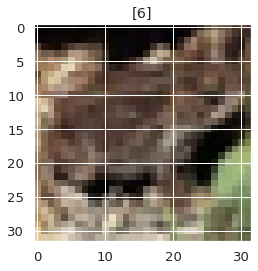

In [3]:
# index a random batch of the images, targets array and plot it
i = np.random.randint(0, 1000)

plt.imshow(Xtrain[i], "gray")   
# plt.grid(True)
plt.title(Ytrain[i])

In [4]:
N_train_imgs = Xtrain.shape[0]
N_test_imgs = Xtest.shape[0]


Xtrain = Xtrain.reshape(N_train_imgs, -1)
Xtrain = Xtrain / 255. 
Ytrain = to_categorical(Ytrain)

Xtest = Xtest.reshape(N_test_imgs, -1)
Xtest = Xtest / 255. 
Ytest = to_categorical(Ytest)


print("Xtrain shape: ", Xtrain.shape, "ytrain shape: ", Ytrain.shape)
print("Xtest shape: ", Xtest.shape, "Ytest shape: ", Ytest.shape)


Xtrain shape:  (50000, 3072) ytrain shape:  (50000, 10)
Xtest shape:  (10000, 3072) Ytest shape:  (10000, 10)


In [5]:
model = Sequential([
    Dense(units=32, activation='relu', input_shape=[3072]),
    #Dropout(0.2),
    Dense(units=64, activation='relu'),
    #Dropout(0.2),
    #Dense(units=128, activation='relu'),
    #Flatten(),

    Dense(units=10, activation="softmax")
])






In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                98336     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 101,098
Trainable params: 101,098
Non-trainable params: 0
_________________________________________________________________


In [7]:
# configure the loss and optimizer and the metrics for the training
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.85,
                         min_lr = 1e-6)

mcp = ModelCheckpoint("./model", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=["acc"] )

In [8]:
# feed the data and train the network
history = model.fit(Xtrain, Ytrain, validation_split=0.25, batch_size=32, epochs=50,callbacks=[lrd, mcp, es])

Epoch 1/50
1172/1172 [==============================] - 8s 6ms/step - loss: 2.0150 - acc: 0.2511 - val_loss: 1.8516 - val_acc: 0.3294

Epoch 00001: val_loss improved from inf to 1.85159, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 2/50
1172/1172 [==============================] - 4s 3ms/step - loss: 1.8493 - acc: 0.3206 - val_loss: 1.8636 - val_acc: 0.3240

Epoch 00002: val_loss did not improve from 1.85159
Epoch 3/50
1172/1172 [==============================] - 4s 3ms/step - loss: 1.8120 - acc: 0.3429 - val_loss: 1.8308 - val_acc: 0.3410

Epoch 00003: val_loss improved from 1.85159 to 1.83078, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 4/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7833 - acc: 0.3550 - val_loss: 1.8055 - val_acc: 0.3519

Epoch 00004: val_loss improved from 1.83078 to 1.80554, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 5/50
1172/1172 [=

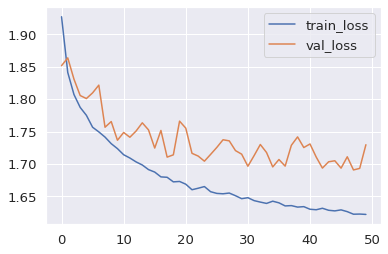

In [9]:
# plot the loss history [train_loss, validation_loss] in a plot
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [11]:
test_res = model.evaluate(Xtest, Ytest, batch_size=32)


train_res = model.evaluate(Xtrain, Ytrain, batch_size=32)
train_res, test_res

1563/1563 [==============================] - 3s 2ms/step - loss: 1.6588 - acc: 0.4018


([1.6588356494903564, 0.40178000926971436],
 [1.7107244729995728, 0.3824000060558319])

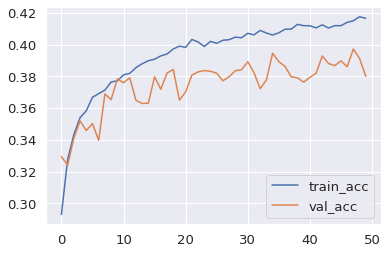

In [12]:
# plot the accuracy history [train_acc, val_acc] in a plot in a separate plot
plt.plot(history.history["acc"], label="train_acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()

In [21]:
#save the model into tf file and the history to a csv file        
models.save_model(
    model,filepath='/content/model')
 

INFO:tensorflow:Assets written to: /content/model/assets


In [22]:
# print the accuracy, and loss scores on testing dataset
train_res = model.evaluate(Xtrain, Ytrain)
test_res = model.evaluate(Xtest, Ytest)

print("-"*50, "\n")
print(f"train_loss: {train_res[0]:.3f}", "\t", f"test_loss: {test_res[0]:.3f}")
print(f"train_acc: {train_res[1]:.3f}", "\t", f"test_acc: {test_res[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7107 - acc: 0.3824
-------------------------------------------------- 

train_loss: 1.659 	 test_loss: 1.711
train_acc: 0.402 	 test_acc: 0.382


In [27]:
model.save('CIFAR.h5')

result:  8


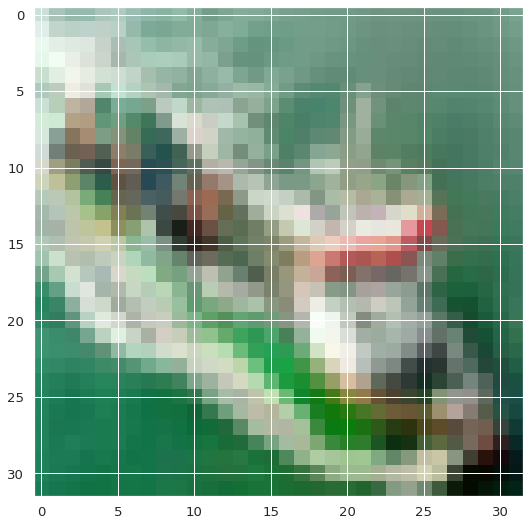

In [26]:
# create a Xtest_batch
i = np.random.randint(0, 1000)

X = Xtest[15]
X = np.expand_dims(X, axis=0)
Ypred = model.predict(X)
X = X.reshape(32, 32,3)



# predict the Ypred_batch

Ypred = np.round(Ypred, 3)
print("result: ", Ypred.argmax())

# plot the predicted batch
plt.imshow(X)

In [ ]:
Xtest = Xtest.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[2])


In [ ]:
Ytest = Ytest.astype(int)
predictions = predictions.astype(int)

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[Ytest[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(Xtest[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
#we can use keras tuner but me be will do it later 

'''def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model'''
    